In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
max_features = 10000  # Incrementamos la cantidad de palabras consideradas
maxlen = 500  # Ajustamos el largo máximo de las reseñas

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model = Sequential()
model.add(Embedding(max_features, 128))  # Incrementamos la dimensión del embedding
model.add(LSTM(64, return_sequences=True))  # Agregamos return_sequences=True para posibles capas adicionales
model.add(Dropout(0.2))  # Añadimos Dropout para reducir overfitting
model.add(LSTM(32))  # Segunda capa LSTM
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Early stopping para evitar overfitting
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 197s 487ms/step - accuracy: 0.7256 - loss: 0.5202 - val_accuracy: 0.8694 - val_loss: 0.3349
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 191s 488ms/step - accuracy: 0.9081 - loss: 0.2506 - val_accuracy: 0.8563 - val_loss: 0.3435
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 193s 494ms/step - accuracy: 0.9328 - loss: 0.1907 - val_accuracy: 0.7922 - val_loss: 0.4908
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 194s 496ms/step - accuracy: 0.9332 - loss: 0.1845 - val_accuracy: 0.8699 - val_loss: 0.3592


In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.8707 - loss: 0.3622
Loss: 0.3591800928115845, Accuracy: 0.869920015335083


782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step


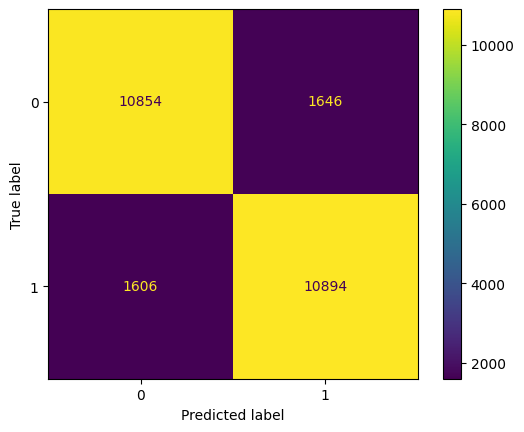

In [7]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()